# This notebook demonstrates the results of the updated 730nm SPC mode for the Roman Space Telescope. 

In [1]:
from astropy.io import fits
import astropy.units as u
import webbpsf
from webbpsf import wfirst
import ipywidgets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle
plt.rcParams.update({'image.origin': 'lower',
                     'image.interpolation':"nearest"})
import os
from pathlib import Path

webbpsf.setup_logging()
cgidir = Path(os.environ['WEBBPSF_PATH'] + '/CGI/optics') # insert your own path to the CGI optics directory
f730dir = cgidir/'F730'
print(f730dir)

def display_both(psf):
    for inter in psf[1]:
        plt.figure()
        inter.display(what='both')
        
lam0 = 730e-9*u.m
D = 2.3631*u.m
as_per_lamD = (lam0/D * u.radian).to(u.arcsec)

from importlib import reload

**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-027 IS BEHIND THE CURRENT ONLINE VERSION PRDOPSSOC-031
Please consider updating pysiaf, e.g. pip install --upgrade pysiaf or conda update pysiaf
WebbPSF log messages of level INFO and above will be shown.
WebbPSF log outputs will be directed to the screen.
/groups/douglase/webbpsf-data/CGI/optics/F730


## Initialize the SPC 730nm mode. 

[webbpsf] Set the following optical configuration:
[webbpsf] camera = IFS, filter = F730, apodizer = CHARSPC730, fpm = CHARSPC_F730_BOWTIE, lyotstop = LS_F730
[  poppy] No source spectrum supplied, therefore defaulting to 5700 K blackbody
[  poppy] Computing wavelength weights using synthetic photometry for F730...
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /groups/douglase/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
[  poppy] Added image plane: CHAR

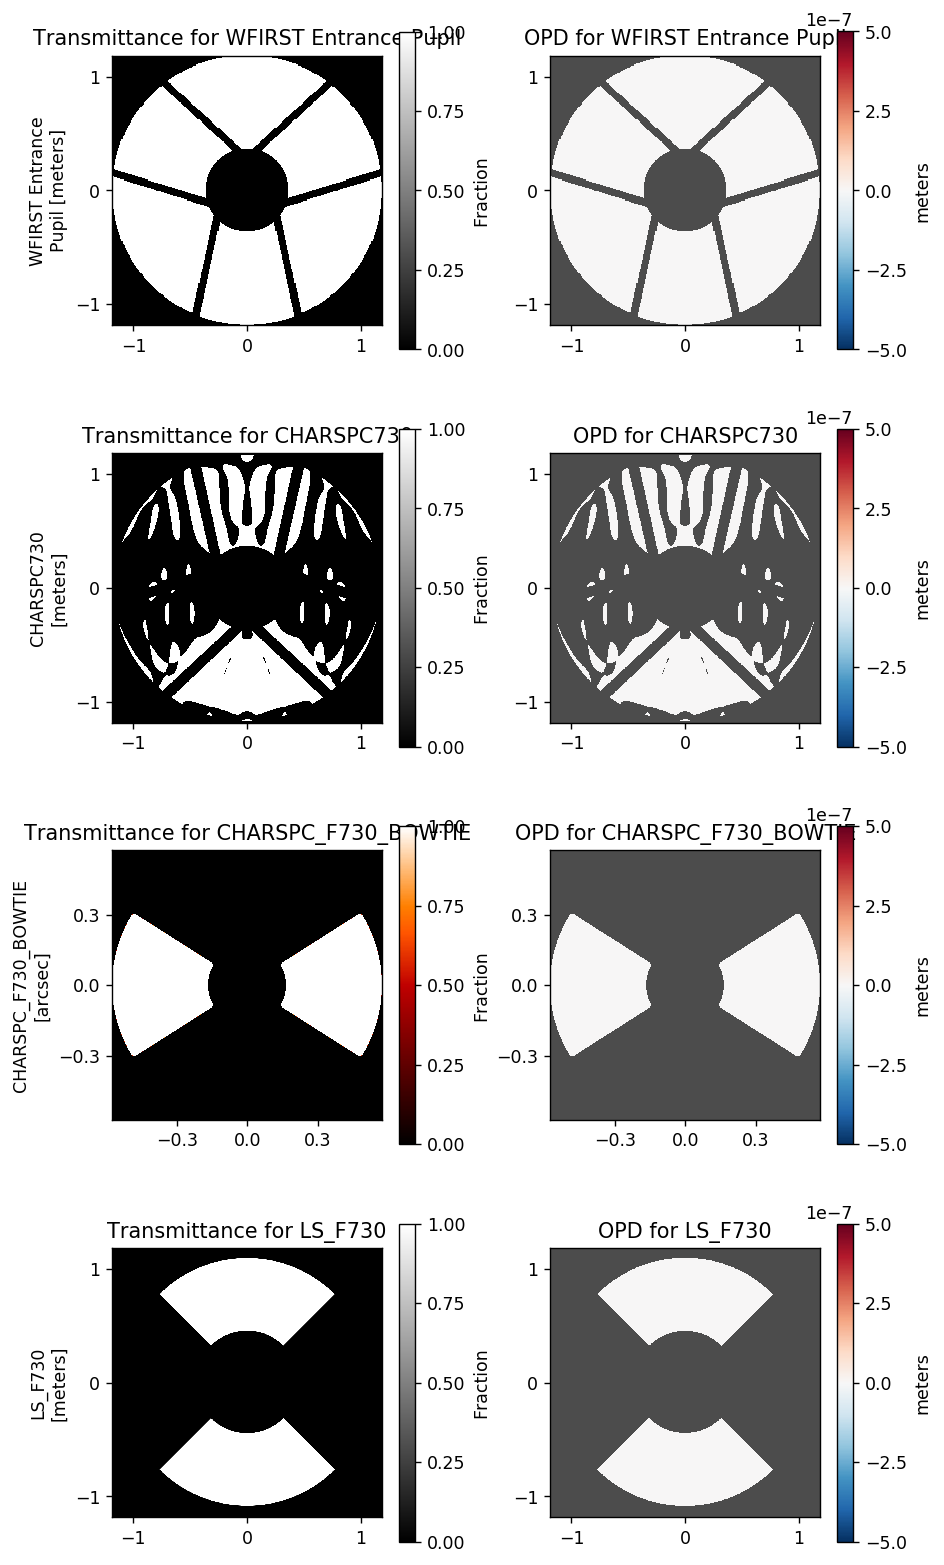

In [2]:
spc730 = wfirst.CGI(mode='CHARSPC_F730')
plt.figure(figsize=(8,16), dpi=125)
spc730.display()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.25)

[  poppy] No source spectrum supplied, therefore defaulting to 5700 K blackbody
[  poppy] PSF calc using fov_arcsec = 1.274371, oversample = 4, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /groups/douglase/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
[  poppy] Added image plane: CHARSPC_F730_BOWTIE
[  poppy] LS_F730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/LS_SPC-20190130.fits
[  poppy] 

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 1.589 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 4


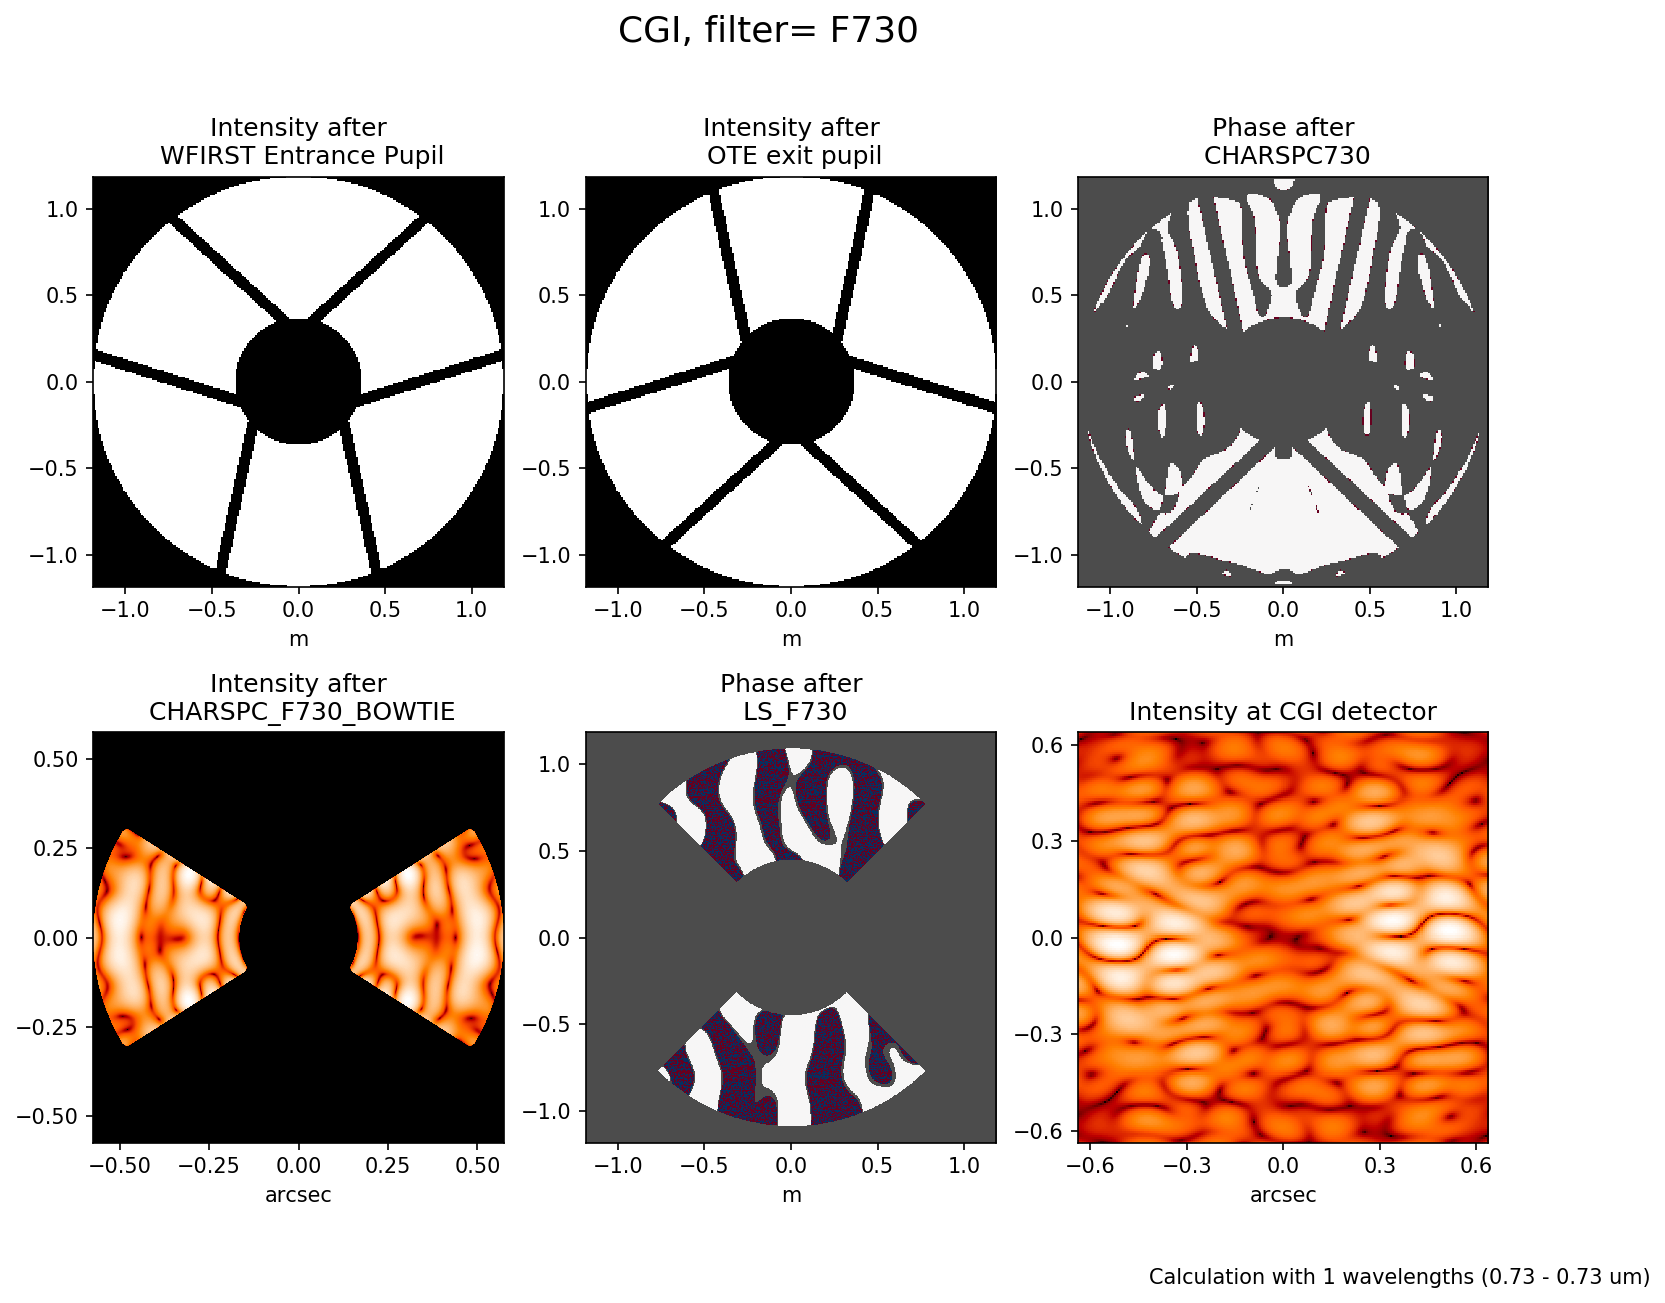

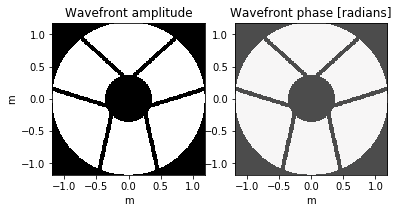

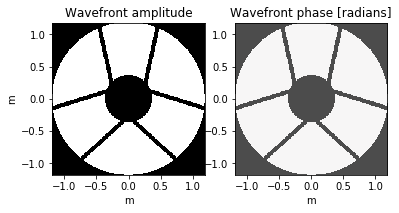

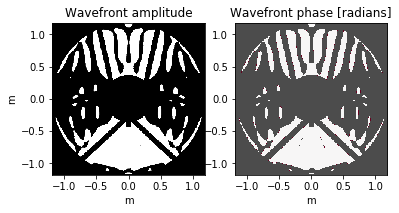

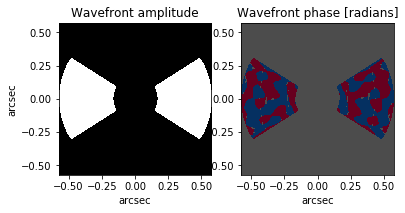

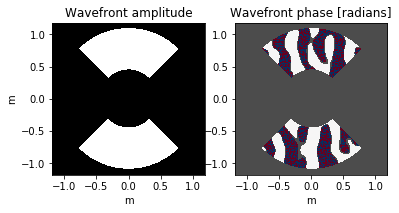

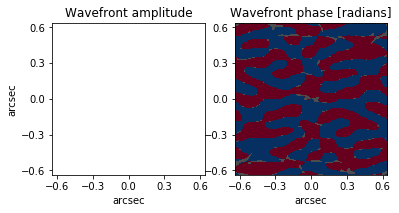

In [3]:
fov_as = 20*as_per_lamD.value
spc730.options['source_offset_r'] = 0 # arcsec
spc730.options['source_offset_theta'] = 0 # deg w.r.t. North

plt.figure(figsize=[12,9], dpi=150)
monopsf_onax = spc730.calc_psf(nlambda=1, fov_arcsec=fov_as, display=True, return_intermediates=True)

display_both(monopsf_onax)

## Calculate off-axis PSF.

[  poppy] No source spectrum supplied, therefore defaulting to 5700 K blackbody
[  poppy] PSF calc using fov_arcsec = 1.274371, oversample = 4, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /groups/douglase/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
[  poppy] Added image plane: CHARSPC_F730_BOWTIE
[  poppy] LS_F730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/LS_SPC-20190130.fits
[  poppy] 

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 1.633 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 4


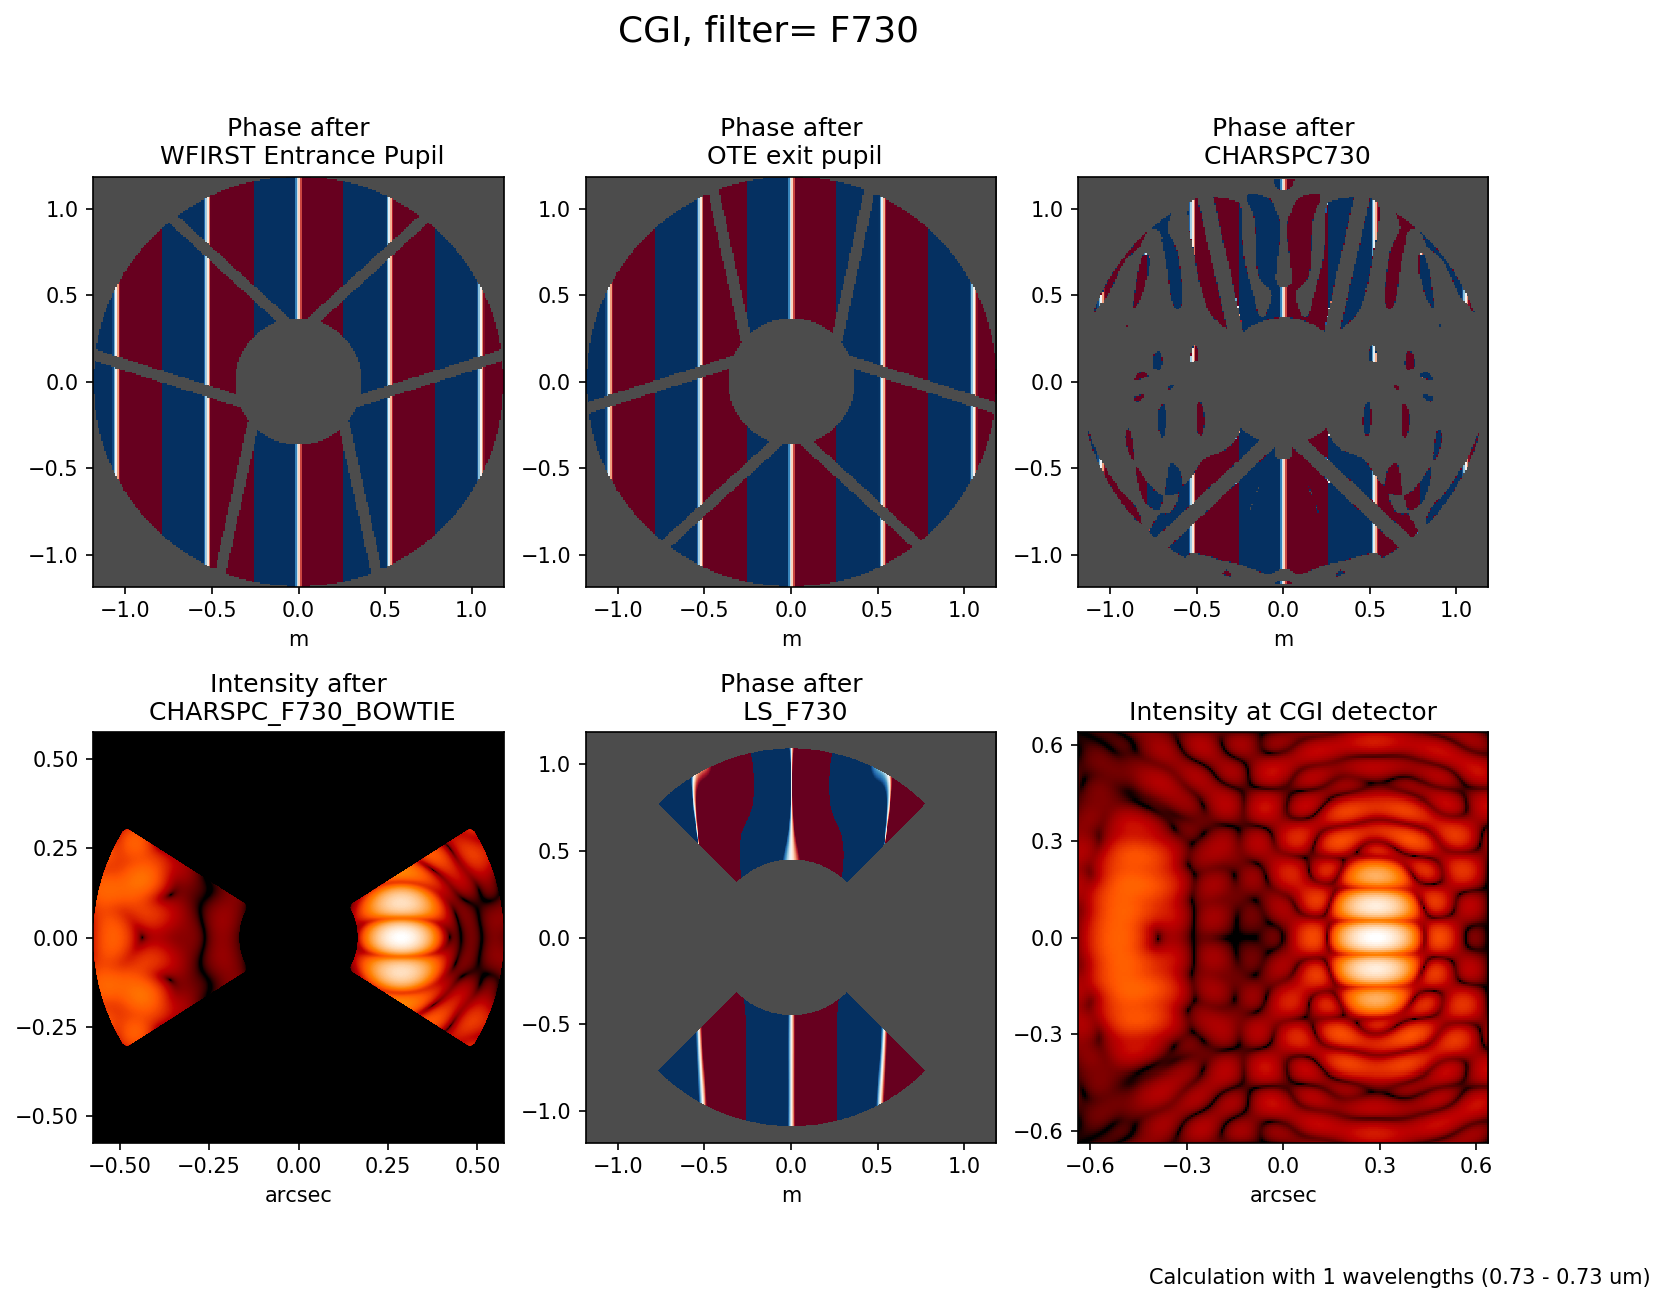

In [4]:
spc730.options['source_offset_r'] = 4.5*as_per_lamD.value # arcsec
spc730.options['source_offset_theta'] = -90. # deg w.r.t. North

plt.figure(figsize=[12,9], dpi = 150)
monopsf_offax = spc730.calc_psf(nlambda=1, fov_arcsec=fov_as, display=True, return_intermediates=True)

## Display both PSFs side-by-side.

The pixelscale of the images generated are 0.098039 lam/D


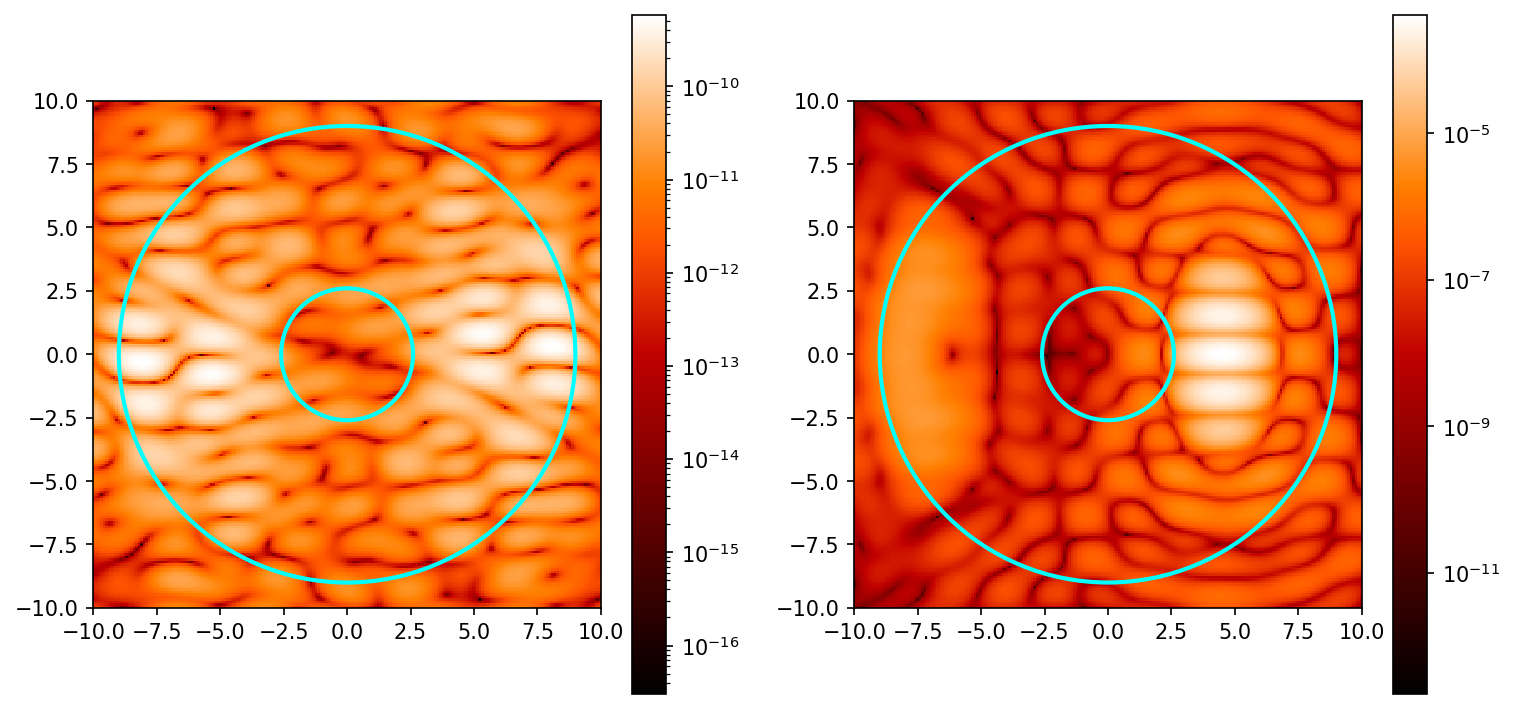

In [5]:
fig, ax  = plt.subplots(nrows=1, ncols=2, figsize=(12,6), dpi=150)

exmax = fov_as/as_per_lamD.value/2
pxscl_lamD = exmax/(monopsf_offax[0][0].data.shape[0]/2) # assuming the same pixelscale for both images
extent = [-exmax,exmax,-exmax,exmax]
print('The pixelscale of the images generated are {:.5} lam/D'.format(pxscl_lamD))

im = ax[0].imshow(monopsf_onax[0][0].data, norm=LogNorm(), cmap=plt.get_cmap('gist_heat'), extent=extent)
ax[0].add_patch(Circle((0,0),2.6,edgecolor='cyan', facecolor='none', linewidth=2))
ax[0].add_patch(Circle((0,0),9,edgecolor='cyan', facecolor='none', linewidth=2))
fig.colorbar(im, ax=ax[0], shrink=1) 

im = ax[1].imshow(monopsf_offax[0][0].data, norm=LogNorm(), cmap=plt.get_cmap('gist_heat'), extent=extent)
ax[1].add_patch(Circle((0,0),2.6,edgecolor='cyan', facecolor='none', linewidth=2))
ax[1].add_patch(Circle((0,0),9,edgecolor='cyan', facecolor='none', linewidth=2))
fig.colorbar(im, ax=ax[1], shrink=1) 

## Compare the on-axis PSF generated by the Webbpsf model to one that was created by the PROPER Phase-B model. 

The pixelscale of the result from PROPER is 0.098039 lam/D.


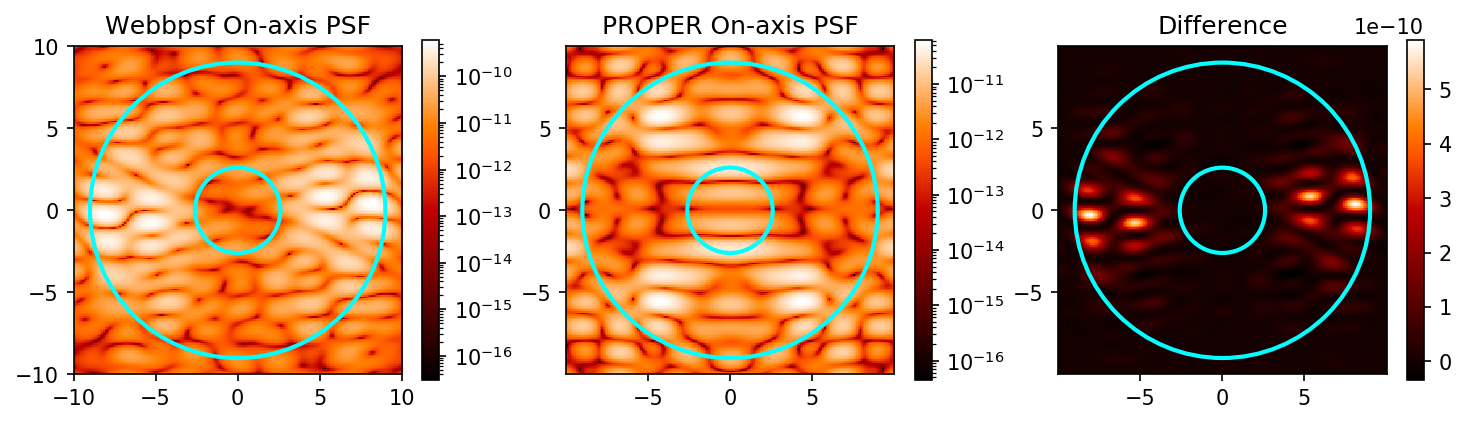

In [6]:
proper_psf_fpath = f730dir/'proper_spcf730_onax_result.fits'
proper_spc_onax = fits.getdata(proper_psf_fpath)
proper_spc_onax_hdr = fits.getheader(proper_psf_fpath)
print('The pixelscale of the result from PROPER is {:0.5} lam/D.'.format(proper_spc_onax_hdr['PIXSCALE']))

# trim the PROPER result to match the dimensions of the Webbpsf result
trim = int( (proper_spc_onax.shape[0] - monopsf_offax[0][0].data.shape[0])/2 )
proper_spc_onax = proper_spc_onax[trim:-trim,trim:-trim]

fig, ax  = plt.subplots(nrows=1, ncols=3, figsize=(12,4), dpi=150)

exmax = fov_as/as_per_lamD.value/2
extent = [-exmax,exmax,-exmax,exmax]

im = ax[0].imshow(monopsf_onax[0][0].data, norm=LogNorm(), cmap=plt.get_cmap('gist_heat'), extent=extent)
ax[0].add_patch(Circle((0,0),2.6,edgecolor='cyan', facecolor='none', linewidth=2))
ax[0].add_patch(Circle((0,0),9,edgecolor='cyan', facecolor='none', linewidth=2))
ax[0].set_title('Webbpsf On-axis PSF')
fig.colorbar(im, ax=ax[0], shrink=0.75) 

exmax = proper_spc_onax_hdr['PIXSCALE']*proper_spc_onax.shape[0]/2 # 0.1lam/D is the pixelscale for the proper result
extent = [-exmax,exmax,-exmax,exmax]

im = ax[1].imshow(proper_spc_onax, norm=LogNorm(), cmap=plt.get_cmap('gist_heat'), extent=extent)
ax[1].add_patch(Circle((0,0),2.6,edgecolor='cyan', facecolor='none', linewidth=2))
ax[1].add_patch(Circle((0,0),9,edgecolor='cyan', facecolor='none', linewidth=2))
ax[1].set_title('PROPER On-axis PSF')
fig.colorbar(im, ax=ax[1], shrink=0.75) 

diff = monopsf_onax[0][0].data - proper_spc_onax
im = ax[2].imshow(diff, cmap=plt.get_cmap('gist_heat'), extent=extent)
ax[2].add_patch(Circle((0,0),2.6,edgecolor='cyan', facecolor='none', linewidth=2))
ax[2].add_patch(Circle((0,0),9,edgecolor='cyan', facecolor='none', linewidth=2))
ax[2].set_title('Difference')
fig.colorbar(im, ax=ax[2], shrink=0.75) 

## Compare the off-axis PSF generated by the Webbpsf model to one that was created by the PROPER Phase-B model. 

The pixelscale of the result from PROPER is 0.098039 lam/D.


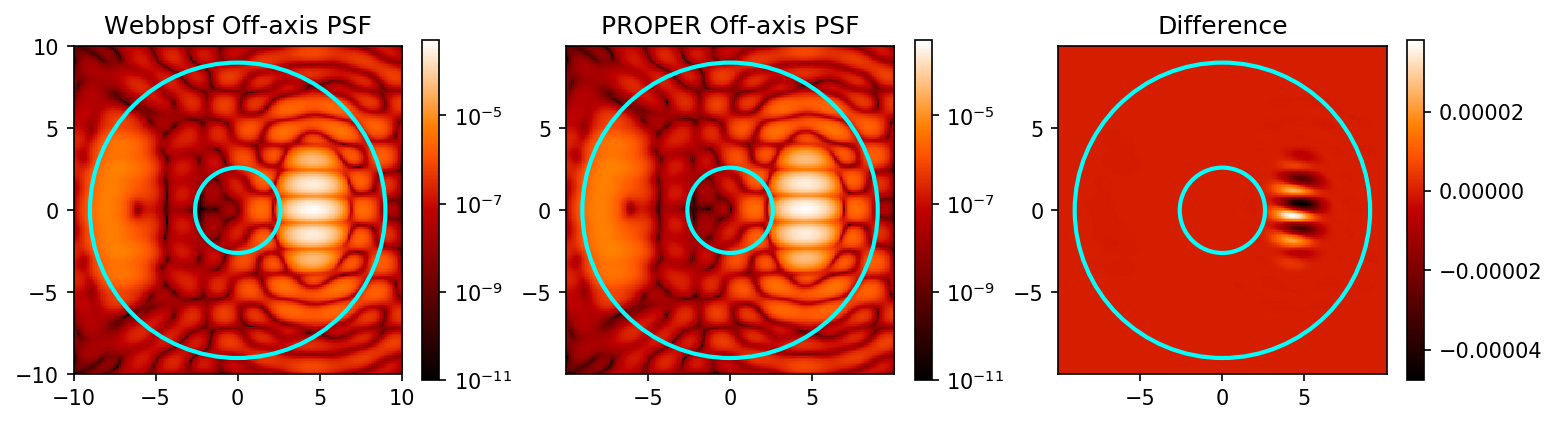

In [7]:
proper_psf_fpath = f730dir/'proper_spcf730_offax_result.fits'
proper_spc_offax = fits.getdata(proper_psf_fpath)
proper_spc_offax_hdr = fits.getheader(proper_psf_fpath)
print('The pixelscale of the result from PROPER is {:0.5} lam/D.'.format(proper_spc_offax_hdr['PIXSCALE']))

# trim the PROPER result to match the dimensions of the Webbpsf result
trim = int( (proper_spc_offax.shape[0] - monopsf_offax[0][0].data.shape[0])/2 )
proper_spc_offax = proper_spc_offax[trim:-trim,trim:-trim]

fig, ax  = plt.subplots(nrows=1, ncols=3, figsize=(12,4), dpi=150)
norm = LogNorm(vmax=5e-4, vmin=1e-11)
exmax = fov_as/as_per_lamD.value/2
extent = [-exmax,exmax,-exmax,exmax]

im = ax[0].imshow(monopsf_offax[0][0].data, norm=norm, cmap=plt.get_cmap('gist_heat'), extent=extent)
ax[0].add_patch(Circle((0,0),2.6,edgecolor='cyan', facecolor='none', linewidth=2))
ax[0].add_patch(Circle((0,0),9,edgecolor='cyan', facecolor='none', linewidth=2))
ax[0].set_title('Webbpsf Off-axis PSF')
fig.colorbar(im, ax=ax[0], shrink=0.75) 

exmax = proper_spc_offax_hdr['PIXSCALE']*proper_spc_offax.shape[0]/2 # 0.1lam/D is the pixelscale for the proper result
extent = [-exmax,exmax,-exmax,exmax]

im = ax[1].imshow(proper_spc_offax, norm=norm, cmap=plt.get_cmap('gist_heat'), extent=extent)
ax[1].add_patch(Circle((0,0),2.6,edgecolor='cyan', facecolor='none', linewidth=2))
ax[1].add_patch(Circle((0,0),9,edgecolor='cyan', facecolor='none', linewidth=2))
ax[1].set_title('PROPER Off-axis PSF')
fig.colorbar(im, ax=ax[1], shrink=0.75) 

diff = monopsf_offax[0][0].data - proper_spc_offax
im = ax[2].imshow(diff, cmap=plt.get_cmap('gist_heat'), extent=extent)
ax[2].add_patch(Circle((0,0),2.6,edgecolor='cyan', facecolor='none', linewidth=2))
ax[2].add_patch(Circle((0,0),9,edgecolor='cyan', facecolor='none', linewidth=2))
ax[2].set_title('Difference')
fig.colorbar(im, ax=ax[2], shrink=0.75)

## Calculate the contrast.

In [8]:
spc730 = spc730 = wfirst.CGI(mode='CHARSPC_F730')

filter_fname = spc730._filters[spc730.filter].filename
filter_hdulist = fits.open(filter_fname)
wave_beg = (float(filter_hdulist[1].header.get('LAMBDA0')) - float(filter_hdulist[1].header.get('DELTALAM'))/2)
wave_end = (float(filter_hdulist[1].header.get('LAMBDA0')) + float(filter_hdulist[1].header.get('DELTALAM'))/2)
deltalam_ifs = float(filter_hdulist[1].header.get('LAMBDA0'))/70. # Assume spectral resolution R = 70
Nchan = (int(np.floor((wave_end - wave_beg)/deltalam_ifs))//2)*2 + 1 # Number of channels, forced to an odd integer
wavelens = np.linspace(wave_beg, wave_end, Nchan) * 1e-10 # all wavelengths to model, in meters

lamoD_asec = float(filter_hdulist[1].header.get('LAMBDA0'))*1e-10/(2*spc730.PUPIL_RADIUS) * 180/np.pi * 3600
print("System diffraction resolution element scale (lambda_0/D) in arcsec: %.3f" % lamoD_asec)
print("IFS spectral parameters: %d channels of characteristic spectral width %.2f nm," % (Nchan,deltalam_ifs/10.))
print("ranging from %d nm to %d nm, centered on %d nm" % (wavelens[0]*1e9, wavelens[-1]*1e9, wavelens[Nchan//2]*1e9))
filter_hdulist.close()

[webbpsf] Set the following optical configuration:
[webbpsf] camera = IFS, filter = F730, apodizer = CHARSPC730, fpm = CHARSPC_F730_BOWTIE, lyotstop = LS_F730
System diffraction resolution element scale (lambda_0/D) in arcsec: 0.063
IFS spectral parameters: 11 channels of characteristic spectral width 10.43 nm,
ranging from 675 nm to 784 nm, centered on 730 nm


### Calculate an on-axis datacube of PSFs for different wavelengths.

In [9]:
spc730.options['source_offset_r'] = 0 # arcsec
spc730.options['source_offset_theta'] = 0 # deg w.r.t. North

spc_psf_onax = spc730.calc_datacube(wavelens, fov_arcsec=fov_as, oversample=8, display=False)
print("The resulting data cube has dimensions {} wavelengths x {} pixels x {} pixels".format\
      (spc_psf_onax[1].data.shape[0], spc_psf_onax[1].data.shape[1], spc_psf_onax[1].data.shape[2]))

[  poppy] Starting multiwavelength data cube calculation.
[  poppy] Monochromatic calculation requested.
[  poppy] PSF calc using fov_arcsec = 1.274371, oversample = 8, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /groups/douglase/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
[  poppy] Added image plane: CHARSPC_F730_BOWTIE
[  poppy] LS_F730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/LS_SPC

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 0.371 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 8
[  poppy] Monochromatic calculation requested.
[  poppy] PSF calc using fov_arcsec = 1.274371, oversample = 8, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /groups/douglase/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
[

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 0.433 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 8
[  poppy] Monochromatic calculation requested.
[  poppy] PSF calc using fov_arcsec = 1.274371, oversample = 8, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /groups/douglase/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
[

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 0.550 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 8
[  poppy] Monochromatic calculation requested.
[  poppy] PSF calc using fov_arcsec = 1.274371, oversample = 8, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /groups/douglase/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
[

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 0.432 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 8
[  poppy] Monochromatic calculation requested.
[  poppy] PSF calc using fov_arcsec = 1.274371, oversample = 8, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /groups/douglase/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
[

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 0.443 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 8
[  poppy] Monochromatic calculation requested.
[  poppy] PSF calc using fov_arcsec = 1.274371, oversample = 8, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /groups/douglase/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
[

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 0.388 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 8
[  poppy] Monochromatic calculation requested.
[  poppy] PSF calc using fov_arcsec = 1.274371, oversample = 8, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /groups/douglase/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
[

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 0.372 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 8
[  poppy] Monochromatic calculation requested.
[  poppy] PSF calc using fov_arcsec = 1.274371, oversample = 8, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /groups/douglase/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
[

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 0.618 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 8
[  poppy] Monochromatic calculation requested.
[  poppy] PSF calc using fov_arcsec = 1.274371, oversample = 8, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /groups/douglase/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
[

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 0.458 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 8
[  poppy] Monochromatic calculation requested.
[  poppy] PSF calc using fov_arcsec = 1.274371, oversample = 8, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /groups/douglase/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
[

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 0.453 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 8
[  poppy] Monochromatic calculation requested.
[  poppy] PSF calc using fov_arcsec = 1.274371, oversample = 8, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /groups/douglase/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
[

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 0.596 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 8
The resulting data cube has dimensions 11 wavelengths x 51 pixels x 51 pixels


### Calculate an off-axis datacube of PSFs for different wavelengths.

In [10]:
spc730.options['source_offset_r'] = 4.5*lamoD_asec  # source of 4.5lam/D used to normalize on-axis PSFs
spc730.options['source_offset_theta'] = -90. # deg w.r.t. North

spc_psf_offax = spc730.calc_datacube(wavelens, fov_arcsec=1.64, oversample=8, display=False)
offax_peak_vec = np.max(np.max(spc_psf_offax[1].data, axis=-1), axis=-1)
offax_peak_cube = np.tile(offax_peak_vec[:,np.newaxis,np.newaxis],
                          (1, spc_psf_onax[1].data.shape[-2], spc_psf_onax[1].data.shape[-1]))

[  poppy] Starting multiwavelength data cube calculation.
[  poppy] Monochromatic calculation requested.
[  poppy] PSF calc using fov_arcsec = 1.640000, oversample = 8, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /groups/douglase/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
[  poppy] Added image plane: CHARSPC_F730_BOWTIE
[  poppy] LS_F730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/LS_SPC

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 0.472 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 8
[  poppy] Monochromatic calculation requested.
[  poppy] PSF calc using fov_arcsec = 1.640000, oversample = 8, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /groups/douglase/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
[

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 0.481 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 8
[  poppy] Monochromatic calculation requested.
[  poppy] PSF calc using fov_arcsec = 1.640000, oversample = 8, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /groups/douglase/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
[

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 0.467 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 8
[  poppy] Monochromatic calculation requested.
[  poppy] PSF calc using fov_arcsec = 1.640000, oversample = 8, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /groups/douglase/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
[

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 0.475 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 8
[  poppy] Monochromatic calculation requested.
[  poppy] PSF calc using fov_arcsec = 1.640000, oversample = 8, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /groups/douglase/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
[

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 0.469 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 8
[  poppy] Monochromatic calculation requested.
[  poppy] PSF calc using fov_arcsec = 1.640000, oversample = 8, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /groups/douglase/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
[

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 0.395 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 8
[  poppy] Monochromatic calculation requested.
[  poppy] PSF calc using fov_arcsec = 1.640000, oversample = 8, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /groups/douglase/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
[

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 0.370 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 8
[  poppy] Monochromatic calculation requested.
[  poppy] PSF calc using fov_arcsec = 1.640000, oversample = 8, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /groups/douglase/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
[

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 0.432 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 8
[  poppy] Monochromatic calculation requested.
[  poppy] PSF calc using fov_arcsec = 1.640000, oversample = 8, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /groups/douglase/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
[

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 0.425 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 8
[  poppy] Monochromatic calculation requested.
[  poppy] PSF calc using fov_arcsec = 1.640000, oversample = 8, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /groups/douglase/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
[

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 0.384 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 8
[  poppy] Monochromatic calculation requested.
[  poppy] PSF calc using fov_arcsec = 1.640000, oversample = 8, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+CGI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /groups/douglase/webbpsf-data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC730: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/SPM_SPC-20190130_rotated.fits
[  poppy] Added pupil plane: CHARSPC730
[  poppy] CHARSPC_F730_BOWTIE: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F730/FPM_res100_SPC-20190130.fits
[

[  poppy] After resampling, optic phasor shape (256, 256) is smaller than input wavefront (256, 256); will zero-pad the rescaled array.


[  poppy]   Calculation completed in 0.419 s
[  poppy] PSF Calculation completed.
[  poppy]  Adding extension with image downsampled to detector pixel scale.
[  poppy]  Downsampling to detector pixel scale, by 8


### Display the off-axis PSFs.

In [11]:
def plt_psf_offax(wchan):
    plt.imshow(spc_psf_offax[1].data[wchan-1], norm=LogNorm(), cmap='gist_heat');
    plt.colorbar()
ipywidgets.interact(plt_psf_offax, wchan=(1,len(wavelens)));

interactive(children=(IntSlider(value=6, description='wchan', max=11, min=1), Output()), _dom_classes=('widget…

### Display the on-axis PSFs normalized to be in contrast units.

In [12]:
spc_psf_onax_contrast = spc_psf_onax[1].data / offax_peak_cube

def plt_psf_onax(wchan):
    plt.imshow(spc_psf_onax_contrast[wchan-1], norm=LogNorm(),
               vmin=3e-10, vmax=1e-6, cmap='gist_heat')
    plt.colorbar()
ipywidgets.interact(plt_psf_onax, wchan=(1,Nchan));

interactive(children=(IntSlider(value=6, description='wchan', max=11, min=1), Output()), _dom_classes=('widget…